In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
dataset = pd.read_csv("E:/JupyterProjects/Machine_Hack/Train.csv")

In [91]:
dataset.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [92]:
dataset.shape

(9568, 5)

In [93]:
dataset = pd.concat([dataset]*20, ignore_index=True)

In [94]:
dataset.shape

(191360, 5)

In [95]:
dataset.describe()

,AT,V,AP,RH,PE
count,191360.000000,191360.000000,191360.000000,191360.000000,191360.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407627,12.679343,5.905789,14.618244,17.039985
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


Text(0, 0.5, 'Number of PE')

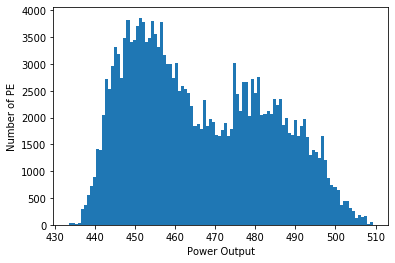

In [96]:
# Histogram of PE (this is the target of our dataset)
plt.hist(dataset['PE'],bins=100)

#label
plt.xlabel('Power Output')
plt.ylabel('Number of PE')

Interesting, now let's see a scatter plot of one feature, versus the target.

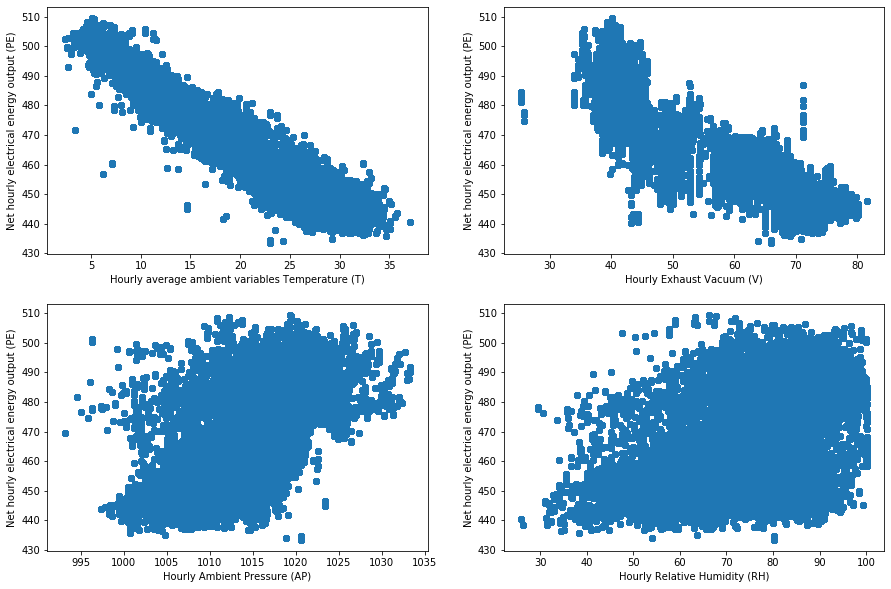

In [97]:
fig = plt.figure(figsize=(15,10))

#AT
ax = fig.add_subplot(221)
plt.scatter(dataset['AT'],dataset['PE'])
plt.ylabel('Net hourly electrical energy output (PE)')
plt.xlabel('Hourly average ambient variables Temperature (T)')

#V
ax = fig.add_subplot(222)
plt.scatter(dataset['V'],dataset['PE'])
plt.ylabel('Net hourly electrical energy output (PE)')
plt.xlabel('Hourly Exhaust Vacuum (V)')

#AP
ax = fig.add_subplot(223)
plt.scatter(dataset['AP'],dataset['PE'])
plt.ylabel('Net hourly electrical energy output (PE)')
plt.xlabel('Hourly Ambient Pressure (AP)')

#RH
ax = fig.add_subplot(224)
plt.scatter(dataset['RH'],dataset['PE'])
plt.ylabel('Net hourly electrical energy output (PE)')
plt.xlabel('Hourly Relative Humidity (RH)')

plt.show()


In [98]:
# Setting X and y variables

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [99]:
print(X.shape)
print(y.shape)

(191360, 4)
(191360,)


In [100]:
# Splitting train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153088, 4)
(38272, 4)
(153088,)
(38272,)


In [85]:
import xgboost as xgb

model = xgb.XGBRegressor(objective = "reg:squarederror", learning_rate = 0.12, n_estimators = 300, 
                         max_depth = 50, random_state = 0, n_jobs = -1)
print (model)

model.fit(X_train,y_train)

# Predicting the test set results
y_pred = model.predict(data=X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.12, max_delta_step=0,
       max_depth=50, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)


In [86]:
# Calculating metrics to analyze errors in regression

from sklearn.metrics  import mean_squared_error, mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: " , mae)
print('Root Mean Squared Error: ' , rmse)

Mean Absolute Error:  0.35274528752079326
Root Mean Squared Error:  0.5795802997953976


In [71]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.88 %
Standard Deviation: 0.00 %


In [87]:
from xgboost import XGBRegressor
from sklearn.metrics  import mean_squared_error, mean_absolute_error
from math import sqrt

def train_RF(n_est, lr, depth):
    rf = XGBRegressor(n_estimators=n_est, learning_rate=lr, max_depth=depth, 
                      n_jobs=-1, objective = "reg:squarederror",  random_state = 0)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print('Est: {} / Learning Rate: {} / Depth: {} ---- MAE: {} / RMSE: {}'.format(
        n_est, lr, depth, round(mae, 6), round(rmse, 6)))

In [88]:
for n_est in [200, 250, 300]:
    for lr in [0.1, 0.115, 0.12,]:
        for depth in [40, 45, 50]:
            train_RF(n_est, lr, depth)

Est: 200 / Learning Rate: 0.1 / Depth: 40 ---- MAE: 0.352756 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.1 / Depth: 45 ---- MAE: 0.352745 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.1 / Depth: 50 ---- MAE: 0.352748 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.115 / Depth: 40 ---- MAE: 0.352752 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.115 / Depth: 45 ---- MAE: 0.352741 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.115 / Depth: 50 ---- MAE: 0.352739 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.12 / Depth: 40 ---- MAE: 0.352754 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.12 / Depth: 45 ---- MAE: 0.352741 / RMSE: 0.57958
Est: 200 / Learning Rate: 0.12 / Depth: 50 ---- MAE: 0.352745 / RMSE: 0.57958
Est: 250 / Learning Rate: 0.1 / Depth: 40 ---- MAE: 0.352756 / RMSE: 0.57958
Est: 250 / Learning Rate: 0.1 / Depth: 45 ---- MAE: 0.352745 / RMSE: 0.57958
Est: 250 / Learning Rate: 0.1 / Depth: 50 ---- MAE: 0.352748 / RMSE: 0.57958
Est: 250 / Learning Rate: 0.115 / Depth: 40 ---- MAE: 0.352752 / RM

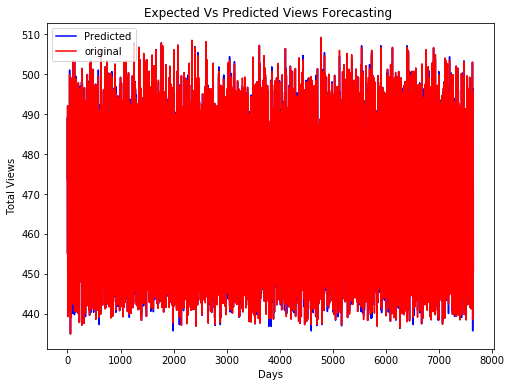

In [37]:
# Visualizing the training set results

plt.figure(figsize=(8, 6))
labels={'Predicted','original'}
plt.plot(y_test, color= 'blue')
plt.plot(y_pred, color = 'red')
plt.title('Expected Vs Predicted Views Forecasting ')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

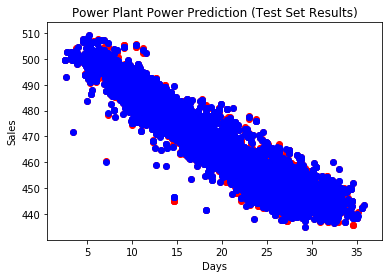

In [38]:
# Visualizing the training set results

plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], y_pred, color='blue')
plt.title('Power Plant Power Prediction (Test Set Results)')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [102]:
# Preparing for submission

X_test = pd.read_csv('E:/JupyterProjects/Machine_Hack/Test.csv')

In [103]:
X_test.shape

(38272, 4)

In [104]:
X_test.head()

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20


In [105]:
# Setting Linear Regression Model

from xgboost import XGBRegressor

regressor = XGBRegressor(objective = "reg:squarederror", learning_rate = 0.1, n_estimators = 300, 
                         max_depth = 45, random_state = 0, n_jobs = -1)
regressor.fit(X, y)
print(regressor)

# Predicting the test set results
y_pred = regressor.predict(X_test.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=45, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)


In [106]:
submission = pd.DataFrame(y_pred)
submission.columns = ['PE']
submission.to_excel('Submission.xlsx', index=False)